# Part1) Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

In [3]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
# Data Exploration

In [5]:
dataset.shape

(1000, 2)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [7]:
dataset.columns

Index(['Review', 'Liked'], dtype='object')

In [8]:
dataset.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [9]:
# Dealing with missing values

In [10]:
dataset.isnull().values.any()

False

In [11]:
# Countplot

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Liked', ylabel='count'>

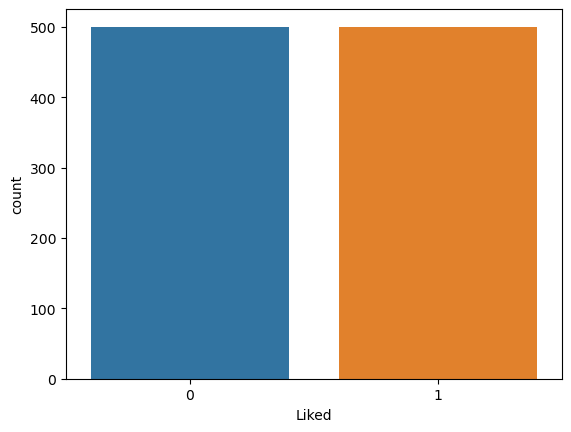

In [12]:
sns.countplot(dataset['Liked'])

In [13]:
#Positive Reviews
(dataset.Liked == 1).sum()

500

In [14]:
#Negative Reviews
(dataset.Liked == 0).sum()

500

In [15]:
# Lenght of messages

In [16]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [17]:
dataset['Length'] = dataset['Review'].apply(len)

In [18]:
dataset.head()

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


<AxesSubplot:ylabel='Frequency'>

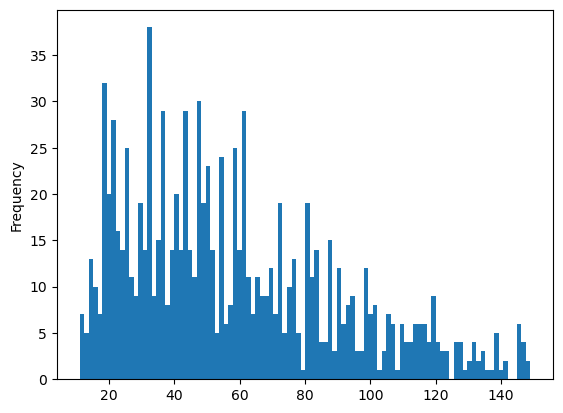

In [19]:
# Histogram

dataset['Length'].plot(bins=100, kind='hist')

In [20]:
dataset.Length.describe()

count    1000.000000
mean       58.315000
std        32.360052
min        11.000000
25%        33.000000
50%        51.000000
75%        80.000000
max       149.000000
Name: Length, dtype: float64

In [22]:
# Longest Massage
dataset[dataset["Length"] == 149]['Review'].iloc[0]

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

In [23]:
# Shortest Massage
dataset[dataset["Length"] == 11]['Review'].iloc[0]

'DELICIOUS!!'

In [29]:
positive = dataset[dataset['Liked'] == 1]

In [30]:
negative = dataset[dataset['Liked'] == 0]

In [31]:
positive

,Review,Liked,Length
0,Wow... Loved this place.,1,24
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
8,The fries were great too.,1,25
9,A great touch.,1,14
...,...,...,...
899,"Overall, a great experience.",1,28
901,Their regular toasted bread was equally satisf...,1,97
907,The chips and sals a here is amazing!!!!!!!!!!...,1,55
909,This is my new fav Vegas buffet spot.,1,37


In [32]:
negative

,Review,Liked,Length
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
5,Now I am getting angry and I want my damn pho.,0,46
6,Honeslty it didn't taste THAT fresh.),0,37
7,The potatoes were like rubber and you could te...,0,111
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


In [33]:
# Cleaning the text

In [34]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PMLS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [36]:
corpus = []

for i in range(0,1000):
    review = re.sub('[^a-zA-Z]', '', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)] #single row for loop
    review = ' '.join(review)
    corpus.append(review)

In [37]:
print(corpus)

['wowlovedthisplac', 'crustisnotgood', 'nottastyandthetexturewasjustnasti', 'stoppedbyduringthelatemaybankholidayoffricksteverecommendationandlovedit', 'theselectiononthemenuwasgreatandsowerethepric', 'nowiamgettingangryandiwantmydamnpho', 'honesltyitdidnttastethatfresh', 'thepotatoeswerelikerubberandyoucouldtelltheyhadbeenmadeupaheadoftimebeingkeptunderawarm', 'thefriesweregreattoo', 'agreattouch', 'servicewasveryprompt', 'wouldnotgoback', 'thecashierhadnocarewhatsoeveronwhatihadtosayitstillendedupbeingwayyyoverpr', 'itriedthecapecodravolichickenwithcranberrymmmm', 'iwasdisgustedbecauseiwasprettysurethatwashumanhair', 'iwasshockedbecausenosignsindicatecashonli', 'highlyrecommend', 'waitresswasalittleslowinservic', 'thisplaceisnotworthyourtimeletalonevega', 'didnotlikeatal', 'theburrittosblah', 'thefoodamaz', 'serviceisalsocut', 'icouldcarelesstheinteriorisjustbeauti', 'sotheyperform', 'thatsrighttheredvelvetcakeohhhthisstuffissogood', 'theyneverbroughtasaladweaskedfor', 'thisholeinthe

In [38]:
len(corpus)

1000